In [1]:
from Wavefronts import *
from Storage_Merge import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display

# More Efficient Algorithm

Intiate Algorithm 

In [2]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()

temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Away,Storage_Away)
Storage_Voltage_Completed.append(temp_wavefront)


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                50
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


In [3]:
Process_Wavefronts()

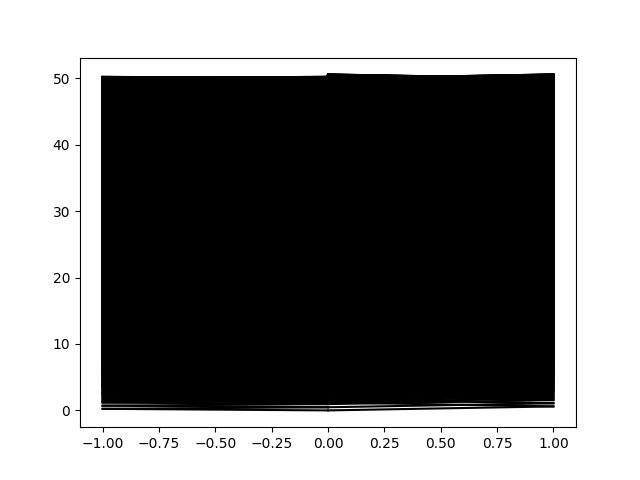

In [4]:
# make it %matplotlib widget
# for widgets

%matplotlib widget
#%matplotlib

for wave in Storage_Capacitor_Completed:
    plt.figure(0)
    x1 = -wave.position_start
    x2 = -wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.time_start <=Simulation_Stop_Time):
        plt.plot([x1,x2],[y1,y2],'k-')


for wave in Storage_Inductor_Completed:
    plt.figure(0)
    x1 = wave.position_start
    x2 = wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.time_start <=Simulation_Stop_Time):
        plt.plot([x1,x2],[y1,y2],'k-')

plt.show()

In [5]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []
combination_count = 0

found_index = True

for wave in Storage_Capacitor_Completed:
    
    time = 0

    time = wave.Time_at_position(1)

    try:
        index = Time_Array_Capacitor.index(time)
        combination_count = combination_count  + 1
        found_index = True
    except:
        found_index = False

    if combination_count == 1:
        print(index)

    if(found_index == False):
        Time_Array_Capacitor.append(time)
        Voltage_Array_Capacitor.append(wave.magnitude_voltage)
        Current_Array_Capacitor.append(wave.magnitude_current)
    else:
        Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
        Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

Voltage_Array_Inductor = []
Current_Array_Inductor = []
Time_Array_Inductor = []

for wave in Storage_Inductor_Completed:
    
    time = 0

    if wave.position_start == 0:
        time = wave.time_start
    else:
        time = wave.time_end

    try:
        index = Time_Array_Inductor.index(time)
        found_index = True
    except:
        found_index = False

    if(found_index == False):
        Time_Array_Inductor.append(time)
        Voltage_Array_Inductor.append(wave.magnitude_voltage)
        Current_Array_Inductor.append(wave.magnitude_current)
    else:
        Voltage_Array_Inductor[index] = Voltage_Array_Inductor[index] + wave.magnitude_voltage
        Current_Array_Inductor[index] = Current_Array_Inductor[index] + wave.magnitude_current

0
0
0


In [6]:
Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
Time_Current_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Current_Array_Capacitor))

Time_Voltage_Array_Inductor = sorted(zip(Time_Array_Inductor,Voltage_Array_Inductor))
Time_Current_Array_Inductor = sorted(zip(Time_Array_Capacitor,Current_Array_Inductor))

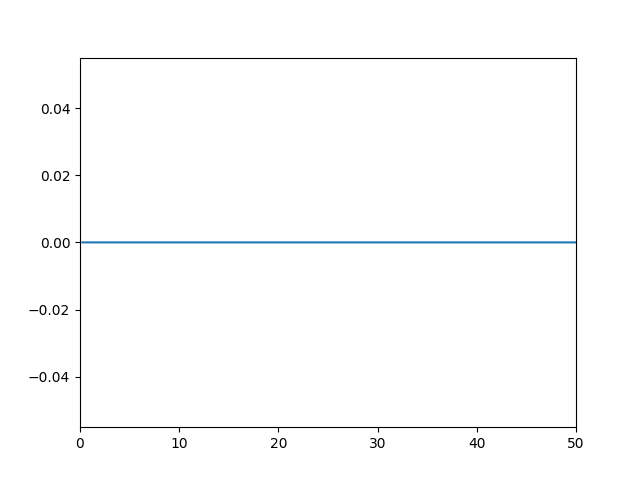

In [7]:
x,y = zip(*Time_Current_Array_Capacitor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.figure(1)
plt.xlim(0,Simulation_Stop_Time)
plt.step(x,y,where='post')



Save as CSV for anaylsis

In [8]:
dict = {'time':x, 'Voltage Capacitor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Capacitor_Voltage.csv',index=False)

Plot Inductor Voltage

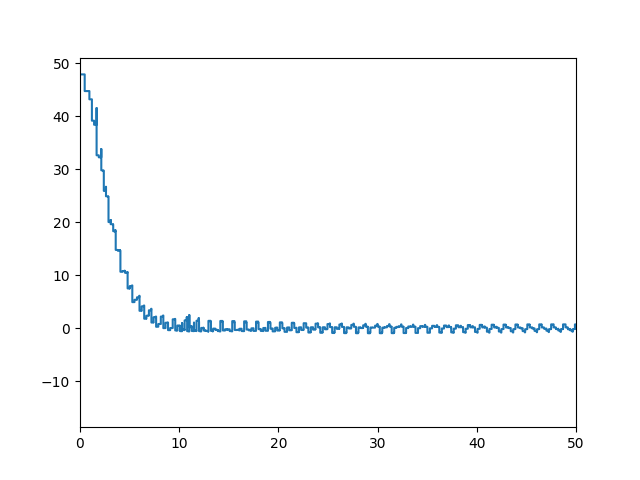

In [9]:
x,y = zip(*Time_Voltage_Array_Inductor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.figure(2)
plt.xlim(0,Simulation_Stop_Time)
plt.step(x,y,where='post')


Save Inductor Voltage

In [10]:
dict = {'time':x, 'Voltage Inductor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage.csv',index=False)

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 2

fig, ax = plt.subplots()

def animate_pos(t):
    Voltage_Array_Capacitor = []
    Current_Array_Capacitor = []
    Time_Array_Capacitor = []
    time = 0

    t_decimal = Decimal(t)
    duration_decimal = Decimal(duration)

    for wave in Storage_Capacitor_Completed:


        time = wave.Time_at_position((t_decimal/duration_decimal)*Capacitor_Length)

        try:
            index = Time_Array_Capacitor.index(time)
        except:
            index = False

        if(index == False):
            Time_Array_Capacitor.append(time)
            Voltage_Array_Capacitor.append(wave.magnitude_voltage)
            Current_Array_Capacitor.append(wave.magnitude_current)
        else:
            Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
            Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

    #Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
    Time_Current_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Current_Array_Capacitor))

    #x,y = zip(*Time_Voltage_Array_Capacitor)
    x,y = zip(*Time_Current_Array_Capacitor)

    x= list(x)
    y= list(y)

    for i in range(1,len(y)-1):
        y[i] = y[i-1]+y[i]

    ax.clear()
    
    ax.step(x,y,where='post')
    ax.set_xlim(0,Simulation_Stop_Time)
    #ax.set_ylim(-0.25,1.3)

    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(animate_pos, duration = duration)
 
# displaying animation with auto play and looping
animation.write_videofile("my_animation.mp4", fps=20)
